In [1]:
import pandas as pd
import numpy as np
import matplotlib
import plotly.express as px

In [2]:
%run ../../modules/utils.ipynb
%run ../../modules/cds.ipynb
%run ../../modules/preprocessing.ipynb

In [3]:
df_mock = pd.read_excel('/Users/bryan/Documents/BioPharmaFinder/BaoLab/FirstBatch/Excels/1_Mock_10ul_9min_NewOmics.xlsx')
df_rsv = pd.read_excel('/Users/bryan/Documents/BioPharmaFinder/BaoLab/FirstBatch/Excels/6_RSV1_10ul_9min_NewOmics.xlsx')
df_mock = thermo_df(df_mock)
df_rsv = thermo_df(df_rsv)
df_mock.shape, df_rsv.shape

((677, 3), (799, 3))

In [30]:
df3 = pd.read_excel('/Users/bryan/Documents/BioPharmaFinder/BaoLab/FirstBatch/Excels/S2to5combined_20ul_40min.xlsx')
df6 = pd.read_excel('/Users/bryan/Documents/BioPharmaFinder/BaoLab/FirstBatch/Excels/S6to10combined_20ul_40min.xlsx')
df3 = thermo_df(df3)
df6 = thermo_df(df6)
df3.shape, df6.shape

((4593, 3), (2727, 3))

In [4]:
df_ngs_5p = pd.read_excel('/Users/bryan/Studio/tools/NGS_24128_5p.xlsx')
df_ngs_3p = pd.read_excel('/Users/bryan/Studio/tools/NGS_24128_3p.xlsx')
df_ngs_5p.shape, df_ngs_3p.shape

((75, 3), (75, 3))

In [4]:
df_glu_5p = pd.read_excel('/Users/bryan/Studio/tools/glu_76_5p.xlsx')
df_glu_3p = pd.read_excel('/Users/bryan/Studio/tools/glu_76_3p.xlsx')
df_glu_5p.shape, df_glu_3p.shape

((75, 3), (75, 3))

In [5]:
def find_exist_ladder_dots(df, series):
    df_ladder = pd.DataFrame()
    df_ladder['Mass'] = series
    df_found = match_dfs(df_ladder, df)
    return df_found

In [8]:
glu_5p = df_glu_5p.Mass - 18
glu_3p = df_glu_3p.Mass - 18

# ngs_5p_m1 = df_ngs_5p.Mass + M
# ngs_5p_m1d2 = ngs_5p_m1 + 2 * 2
# ngs_5p_m2d2 = ngs_5p_m1d2 + M
# ngs_5p_m3d2 = ngs_5p_m2d2 + M
# ngs_5p_m4d2 = ngs_5p_m3d2 + M

# ngs_3p_m1 = df_ngs_3p.Mass + M
# ngs_3p_m2 = ngs_3p_m1 + M
# ngs_3p_m3 = ngs_3p_m2 + M
# ngs_3p_m3d2 = ngs_3p_m3 + 2 * 2
# ngs_3p_m4d2 = ngs_3p_m3d2 + M

In [35]:
glu_5p = df_glu_5p.Mass - 18 
df_match0 = find_exist_ladder_dots(df_mock, glu_5p)
glu_5p = df_glu_5p.Mass - 18 + 2
df_match1 = find_exist_ladder_dots(df_mock, glu_5p)
glu_5p = df_glu_5p.Mass - 18 + 2 - 1
df_match2 = find_exist_ladder_dots(df_mock, glu_5p)
plotly_multi_zones([df_match0, df_match1, df_match2], y='RT')

In [37]:
df_matches = [df_match0, df_match1, df_match2]
df_list = list()
for idx, df in enumerate(df_matches):
    df_tmp = df.copy()
    df_tmp['ModificationId'] = idx
    df_list.append(df_tmp)
df_merge = pd.concat(df_list)
df_merge.to_excel('/Users/bryan/Documents/BioPharmaFinder/Draw/SourceGlu/Fig4_Data_U2C.xlsx')

(<module 'matplotlib.pyplot' from '/Users/bryan/Virtuals/vir_nb/lib/python3.7/site-packages/matplotlib/pyplot.py'>,
 <Figure size 1152x864 with 1 Axes>)

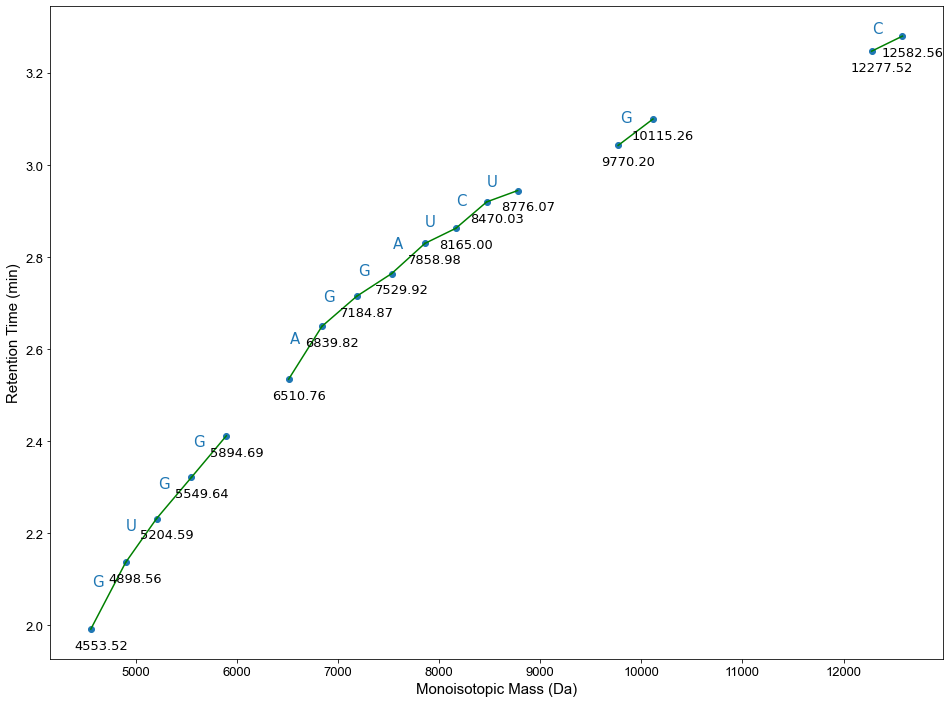

In [38]:

bcr = base_calling_random(df_merge, silence=True)
plot_basecalling(*bcr, annotate=False)

In [39]:
glu_5p = df_glu_5p.Mass - 18 
df_match0 = find_exist_ladder_dots(df_rsv, glu_5p)
glu_5p = df_glu_5p.Mass - 18 + 2
df_match1 = find_exist_ladder_dots(df_rsv, glu_5p)
glu_5p = df_glu_5p.Mass - 18 + 2 - 1
df_match2 = find_exist_ladder_dots(df_rsv, glu_5p)
plotly_multi_zones([df_match0, df_match1, df_match2], y='RT')

In [34]:
glu_5p = df_glu_5p.Mass - 18 
df_match0 = find_exist_ladder_dots(df3, glu_5p)
glu_5p = df_glu_5p.Mass - 18 + 2
df_match1 = find_exist_ladder_dots(df3, glu_5p)
glu_5p = df_glu_5p.Mass - 18 + 2 - 1
df_match2 = find_exist_ladder_dots(df3, glu_5p)
plotly_multi_zones([df_match0, df_match1, df_match2], y='RT')